In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Данные для анализа
load = pd.read_excel("Продажи 18-23.xlsx")

In [89]:
data_in = load.copy()

In [91]:
data_in['Дата'] = pd.to_datetime(data_in['Дата'], infer_datetime_format=True)

In [94]:
# Курс евро, выгрузка с сайта ЦБ
curr_data = pd.read_excel('RC_F01_03_2017_T31_03_2023.xlsx')

In [95]:
curr_data = curr_data[['data', 'curs']]
curr_data['data'] = pd.to_datetime(curr_data['data'])
curr_data = curr_data.set_index('data')

In [96]:
new_curr= pd.DataFrame(index = pd.date_range("2018-01-01", periods=3000, freq="D"))

In [97]:
new_curr['curs'] = curr_data['curs']

In [98]:
new_curr['curs'] = new_curr['curs'].fillna(method='bfill')

In [99]:
new_curr = new_curr.dropna()

In [100]:
data_in = data_in.merge(new_curr, how='left', left_on='Дата', right_on=new_curr.index)

In [101]:
data_in['Цена Евро'] = round(data_in['Сумма продаж (руб.)'] / data_in['curs'], 2)

In [102]:
groups = pd.read_excel('категории товаров для отчета продаж.xlsx')
groups = groups.reindex(columns=['Кат2', 'Товар'])

In [103]:
data_in = data_in.merge(groups, how='left', on='Товар').rename(columns={'Кат2':'Категория товара'})

In [104]:
data_2018 = data_in[(data_in['Дата'].dt.year == 2018)].copy()
data_2019 = data_in[(data_in['Дата'].dt.year == 2019)].copy()
data_2020 = data_in[(data_in['Дата'].dt.year == 2020)].copy()
data_2021 = data_in[(data_in['Дата'].dt.year == 2021)].copy()
data_2022 = data_in[(data_in['Дата'].dt.year == 2022)].copy()
data_2023 = data_in[(data_in['Дата'].dt.year == 2023)].copy()

In [105]:
data_2018['Месяц'] = data_in['Дата'].dt.month
data_2019['Месяц'] = data_in['Дата'].dt.month
data_2020['Месяц'] = data_in['Дата'].dt.month
data_2021['Месяц'] = data_in['Дата'].dt.month
data_2022['Месяц'] = data_in['Дата'].dt.month
data_2023['Месяц'] = data_in['Дата'].dt.month

In [106]:
sales_2018_month = data_2018.groupby(['Месяц', 'Категория товара', 'Филиал'])\
    .agg({'ID': lambda x: len(set(x)),
          'Организация':len, 
          'Сумма продаж (руб.)': sum, 
          'Цена Евро': sum,
          'curs': 'mean',
          'Количество': sum})\
.rename(columns = {'ID': 'Уникальных контрагентов', 
         'Организация': 'Продаж (Накладных)', 
         'Количество': 'Единиц продукции'})

In [107]:
sales_2019_month = data_2019.groupby(['Месяц', 'Категория товара', 'Филиал'])\
    .agg({'ID': lambda x: len(set(x)),
          'Организация':len, 
          'Сумма продаж (руб.)': sum, 
          'Цена Евро': sum,
          'curs': 'mean',
          'Количество': sum})\
.rename(columns = {'ID': 'Уникальных контрагентов', 
         'Организация': 'Продаж (Накладных)', 
         'Количество': 'Единиц продукции'})

In [108]:
sales_2020_month = data_2020.groupby(['Месяц', 'Категория товара', 'Филиал'])\
    .agg({'ID': lambda x: len(set(x)),
          'Организация':len, 
          'Сумма продаж (руб.)': sum, 
          'Цена Евро': sum,
          'curs': 'mean',
          'Количество': sum})\
.rename(columns = {'ID': 'Уникальных контрагентов', 
         'Организация': 'Продаж (Накладных)', 
         'Количество': 'Единиц продукции'})

In [109]:
sales_2020_month = sales_2020_month.drop(sales_2020_month['Продаж (Накладных)'].idxmin())
sales_2020_month = sales_2020_month.drop(sales_2020_month['Продаж (Накладных)'].idxmin())

In [110]:
sales_2021_month = data_2021.groupby(['Месяц', 'Категория товара', 'Филиал'])\
    .agg({'ID': lambda x: len(set(x)),
          'Организация':len, 
          'Сумма продаж (руб.)': sum, 
          'Цена Евро': sum,
          'curs': 'mean',
          'Количество': sum})\
.rename(columns = {'ID': 'Уникальных контрагентов', 
         'Организация': 'Продаж (Накладных)', 
         'Количество': 'Единиц продукции'})

In [111]:
sales_2022_month = data_2022.groupby(['Месяц', 'Категория товара', 'Филиал'])\
    .agg({'ID': lambda x: len(set(x)),
          'Организация':len, 
          'Сумма продаж (руб.)': sum, 
          'Цена Евро': sum,
          'curs': 'mean',
          'Количество': sum})\
.rename(columns = {'ID': 'Уникальных контрагентов', 
         'Организация': 'Продаж (Накладных)', 
         'Количество': 'Единиц продукции'})

In [112]:
sales_2023_month = data_2023.groupby(['Месяц', 'Категория товара', 'Филиал'])\
    .agg({'ID': lambda x: len(set(x)),
          'Организация':len, 
          'Сумма продаж (руб.)': sum, 
          'Цена Евро': sum,
          'curs': 'mean',
          'Количество': sum})\
.rename(columns = {'ID': 'Уникальных контрагентов', 
         'Организация': 'Продаж (Накладных)', 
         'Количество': 'Единиц продукции'})

In [113]:
to_work_2019 = sales_2019_month[['Единиц продукции', 'Цена Евро']].reset_index()
to_work_2019 = to_work_2019.set_index('Месяц').groupby('Месяц').agg({'Единиц продукции': sum, 'Цена Евро': sum})

In [114]:
to_work_2020 = sales_2020_month[['Единиц продукции', 'Цена Евро']].reset_index()
to_work_2020 = to_work_2020.set_index('Месяц').groupby('Месяц').agg({'Единиц продукции': sum, 'Цена Евро': sum})

In [115]:
to_work_2021 = sales_2021_month[['Единиц продукции', 'Цена Евро']].reset_index()
to_work_2021 = to_work_2021.set_index('Месяц').groupby('Месяц').agg({'Единиц продукции': sum, 'Цена Евро': sum})

In [116]:
to_work_2018 = sales_2018_month[['Единиц продукции', 'Цена Евро']].reset_index()
to_work_2018 = to_work_2018.set_index('Месяц').groupby('Месяц').agg({'Единиц продукции': sum, 'Цена Евро': sum})

In [117]:
to_work_2022 = sales_2022_month[['Единиц продукции', 'Цена Евро']].reset_index()
to_work_2022 = to_work_2022.set_index('Месяц').groupby('Месяц').agg({'Единиц продукции': sum, 'Цена Евро': sum})

In [118]:
to_work_2023 = sales_2023_month[['Единиц продукции', 'Цена Евро']].reset_index()
to_work_2023 = to_work_2023.set_index('Месяц').groupby('Месяц').agg({'Единиц продукции': sum, 'Цена Евро': sum})

In [119]:
series = pd.concat([to_work_2018['Единиц продукции'], 
                    to_work_2019['Единиц продукции'], 
                    to_work_2020['Единиц продукции'],
                    to_work_2021['Единиц продукции'], 
                    to_work_2022['Единиц продукции'],
                    to_work_2023['Единиц продукции']])

price = pd.concat([to_work_2018['Цена Евро'],
                   to_work_2019['Цена Евро'],
                   to_work_2020['Цена Евро'],
                   to_work_2021['Цена Евро'], 
                   to_work_2022['Цена Евро'],
                   to_work_2023['Цена Евро']])

Coefficients: [ 1.22885860e+01 -3.74646215e+02  3.96535618e+03 -1.57563856e+04
  9.00330867e+03  4.49699722e+04  2.55605791e+05]


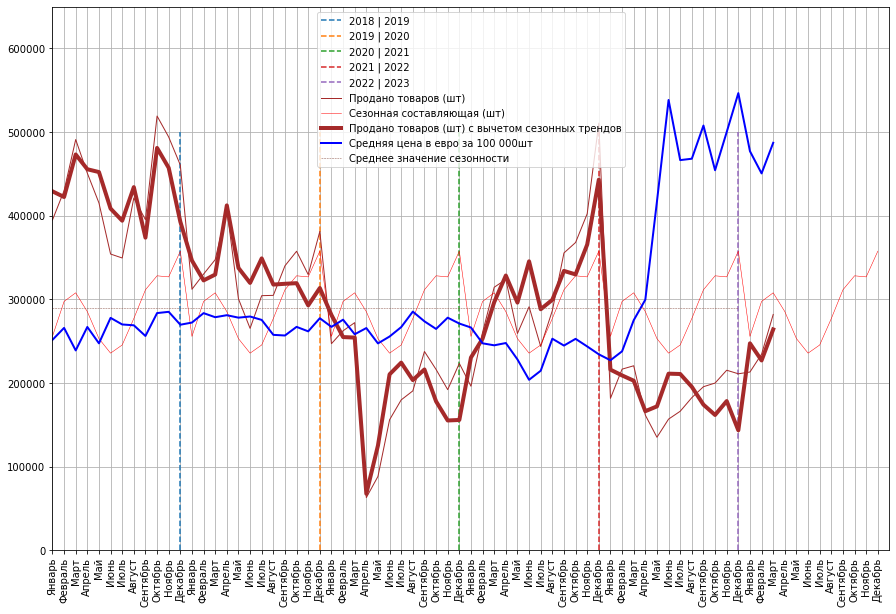

In [120]:
# Построение графика сезонных трендов по количеству продаж в месяц

fig = plt.figure(figsize=(15, 10))
X = [i%12 for i in range(0, len(series))]
y = series.values
degree = 6
coef = np.polyfit(X, y, degree)
print('Coefficients: %s' % coef)

# create curve
curve = list()
for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
        value += X[i]**(degree-d) * coef[d]
    curve.append(value)
    
plt.plot((11, 11),(0, 500000), linewidth=1.5, label='2018 | 2019', linestyle = 'dashed')
plt.plot((23, 23),(0, 500000), linewidth=1.5, label='2019 | 2020', linestyle = 'dashed')
plt.plot((35, 35),(0, 500000), linewidth=1.5, label='2020 | 2021', linestyle = 'dashed')
plt.plot((47, 47),(0, 500000), linewidth=1.5, label='2021 | 2022', linestyle = 'dashed')
plt.plot((59, 59),(0, 500000), linewidth=1.5, label='2022 | 2023', linestyle = 'dashed')

plt.plot(series.values, linewidth=1.0, color='brown', label='Продано товаров (шт)')

plt.plot(curve[0:12]*6, color='red', linewidth=0.5, label='Сезонная составляющая (шт)')
values = series.values
diff = []
mean_curve = sum(curve) / len(curve)
for i in range(len(values)):
    value = values[i] - curve[i]
    diff.append(value + mean_curve)
    
plt.plot(diff, linewidth=4, color='brown', label='Продано товаров (шт) с вычетом сезонных трендов')
plt.plot((price.values / series.values)*100000, linewidth=2.0, color='blue', label='Средняя цена в евро за 100 000шт')


plt.plot((0, 59),(mean_curve, mean_curve), linewidth=0.5, label='Среднее значение сезонности', linestyle = 'dashed')

plt.grid()
plt.xticks(ticks=list(range(0, 72, 1)), labels=['Январь', 'Февраль', 'Март', 
                                   'Апрель', 'Май', 'Июнь', 
                                   'Июль', 'Август', 'Сентябрь', 
                                   'Октябрь', 'Ноябрь', 'Декабрь']*6, 
                                      rotation = 90)

plt.xlim(0, 72)
plt.ylim(0, 650000)
plt.legend(loc=9)
plt.show()

Coefficients: [ 2.23678604e+01 -6.25068054e+02  5.41991403e+03 -8.47402934e+03
 -7.53487681e+04  2.18426517e+05  7.34211079e+05]


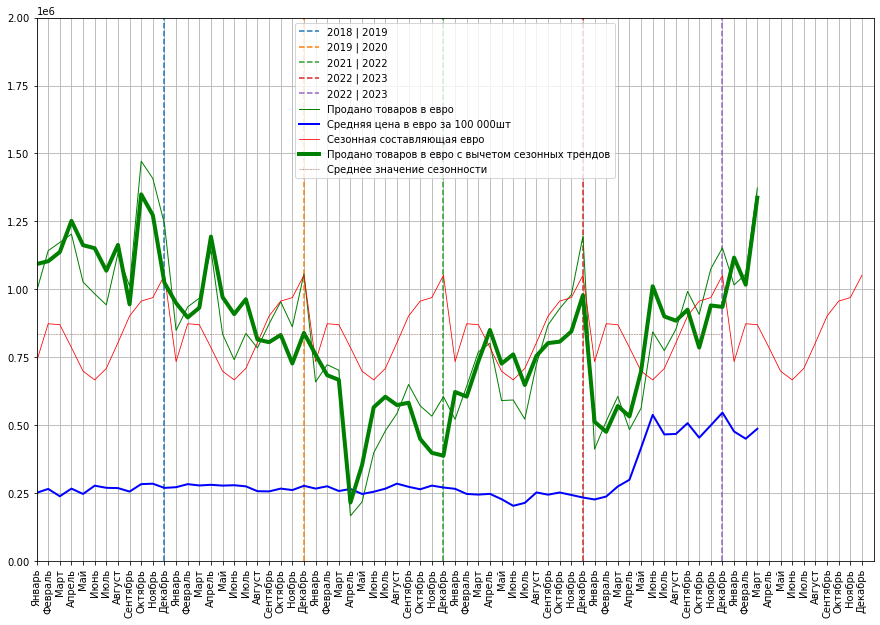

In [121]:
# Построение графика сезонных трендов по выручке в месяц

fig = plt.figure(figsize=(15, 10))
X = [i%12 for i in range(0, len(price))]
y = price.values
degree = 6
coef = np.polyfit(X, y, degree)
print('Coefficients: %s' % coef)

# create curve
curve = list()
for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
        value += X[i]**(degree-d) * coef[d]
    curve.append(value)
    
plt.plot((11, 11),(0, 5000000), linewidth=1.5, label='2018 | 2019', linestyle = 'dashed')
plt.plot((23, 23),(0, 5000000), linewidth=1.5, label='2019 | 2020', linestyle = 'dashed')
plt.plot((35, 35),(0, 5000000), linewidth=1.5, label='2021 | 2022', linestyle = 'dashed')
plt.plot((47, 47),(0, 5000000), linewidth=1.5, label='2022 | 2023', linestyle = 'dashed')
plt.plot((59, 59),(0, 5000000), linewidth=1.5, label='2022 | 2023', linestyle = 'dashed')

plt.plot(price.values, linewidth=1.0, color='green', label='Продано товаров в евро')
plt.plot((price.values / series.values)*100_000, linewidth=2.0, color='blue', label='Средняя цена в евро за 100 000шт')


plt.plot(curve[0:12]*6, color='red', linewidth=0.8, label='Сезонная составляющая евро')
values = price.values
diff = []
mean_curve = sum(curve) / len(curve)
for i in range(len(values)):
    value = values[i] - curve[i]
    diff.append(value + mean_curve)
    
plt.plot(diff, linewidth=4, color='green', label='Продано товаров в евро с вычетом сезонных трендов')
plt.plot((0, 59),(mean_curve, mean_curve), linewidth=0.5, label='Среднее значение сезонности', linestyle = 'dashed')

plt.grid()
plt.xticks(ticks=list(range(0, 72, 1)), labels=['Январь', 'Февраль', 'Март', 
                                   'Апрель', 'Май', 'Июнь', 
                                   'Июль', 'Август', 'Сентябрь', 
                                   'Октябрь', 'Ноябрь', 'Декабрь']*6, 
                                      rotation = 90)

plt.xlim(0, 72)
plt.ylim(0, 2.0*1000000)
plt.legend(loc=9)
plt.show()